In [74]:
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
csv_path = "/Users/frodibrooks/Desktop/DTU/Thesis/OptimisedHeating/validation/logs/validation_full_log_agent303.csv"
# csv_path = r"C:\Users\frodi\Documents\OptimisedHeating\validation\validation_full_log_agent103.csv"
agent_results_df = pd.read_csv(csv_path)

In [76]:
# Set 'Step' as the index
agent_results_df = agent_results_df.set_index('Step')

# Display the updated DataFrame (all columns should remain intact)
agent_results_df.head()


,ActionIndex,DemandScale,Reward,EffReward,Valid heads ratio,Energy reward,Q_0,Q_1,Q_2,Q_3,...,Demand_17,Demand_18,PumpGroupSpeed_1,PumpGroupSpeed_2,PumpGroupSpeed_3,PumpPower_10,PumpPower_17,PumpPower_25,PumpPower_26,PumpPower_27
Step,,,,,,,,,,,,,,,,,,,,,
0,287,0.898,0.000000,0.000000,0.000000,-0.000000,0.931133,0.707241,0.641670,0.824509,...,0.0,0.0,0.95,1.00,1.20,0.000000,0.000000,22.753108,22.757407,16.238898
1,271,0.915,1.586979,1.255254,0.980097,-0.597422,0.823159,0.925094,0.641673,0.818141,...,0.0,0.0,0.95,0.95,0.85,21.041580,21.017920,6.456131,6.459749,7.911097
2,271,0.918,1.587045,1.257194,0.980097,-0.599202,0.887939,0.766665,0.662213,0.843022,...,0.0,0.0,0.95,0.95,0.85,21.092902,21.069133,6.488112,6.491744,7.932052
3,271,0.917,1.587026,1.256551,0.980097,-0.598609,0.885929,0.766804,0.661086,0.842149,...,0.0,0.0,0.95,0.95,0.85,21.075790,21.052058,6.477462,6.481089,7.925073
4,271,0.924,1.584976,1.260978,0.979021,-0.602760,0.886599,0.766757,0.661462,0.842440,...,0.0,0.0,0.95,0.95,0.85,21.195659,21.171671,6.551811,6.555471,7.973814


In [77]:
df_tranposed = agent_results_df.T
df_tranposed.to_excel('agent_results_transposed.xlsx', index=True)

In [78]:
for name in agent_results_df.columns:
    print(name)

ActionIndex
DemandScale
Reward
EffReward
Valid heads ratio
Energy reward
Q_0
Q_1
Q_2
Q_3
Q_4
Q_5
Q_6
Q_7
Q_8
Q_9
Q_10
Q_11
Q_12
Q_13
Q_14
Q_15
Q_16
Q_17
Q_18
Q_19
Q_20
Q_21
Q_22
Q_23
Q_24
Q_25
Q_26
Q_27
Q_28
Q_29
Q_30
Q_31
Q_32
Q_33
Q_34
Q_35
Q_36
Q_37
Q_38
Q_39
Q_40
Q_41
Q_42
Q_43
Q_44
Q_45
Q_46
Q_47
Q_48
Q_49
Q_50
Q_51
Q_52
Q_53
Q_54
Q_55
Q_56
Q_57
Q_58
Q_59
Q_60
Q_61
Q_62
Q_63
Q_64
Q_65
Q_66
Q_67
Q_68
Q_69
Q_70
Q_71
Q_72
Q_73
Q_74
Q_75
Q_76
Q_77
Q_78
Q_79
Q_80
Q_81
Q_82
Q_83
Q_84
Q_85
Q_86
Q_87
Q_88
Q_89
Q_90
Q_91
Q_92
Q_93
Q_94
Q_95
Q_96
Q_97
Q_98
Q_99
Q_100
Q_101
Q_102
Q_103
Q_104
Q_105
Q_106
Q_107
Q_108
Q_109
Q_110
Q_111
Q_112
Q_113
Q_114
Q_115
Q_116
Q_117
Q_118
Q_119
Q_120
Q_121
Q_122
Q_123
Q_124
Q_125
Q_126
Q_127
Q_128
Q_129
Q_130
Q_131
Q_132
Q_133
Q_134
Q_135
Q_136
Q_137
Q_138
Q_139
Q_140
Q_141
Q_142
Q_143
Q_144
Q_145
Q_146
Q_147
Q_148
Q_149
Q_150
Q_151
Q_152
Q_153
Q_154
Q_155
Q_156
Q_157
Q_158
Q_159
Q_160
Q_161
Q_162
Q_163
Q_164
Q_165
Q_166
Q_167
Q_168
Q_169
Q_170
Q_171
Q_172

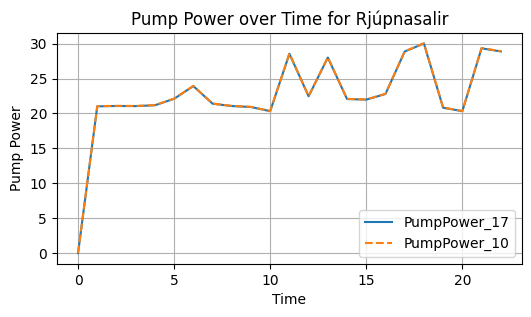

In [79]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_17'], label='PumpPower_17')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_10'], label='PumpPower_10', linestyle='--')

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Pump Power")
plt.title("Pump Power over Time for Rjúpnasalir")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


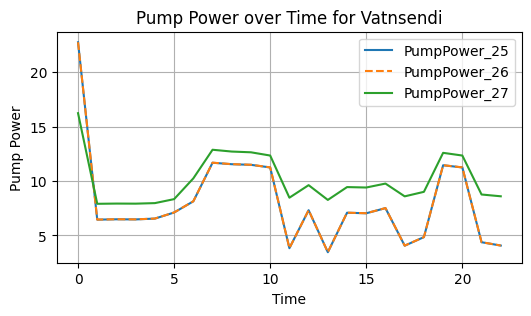

In [80]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_25'], label='PumpPower_25')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_26'], label='PumpPower_26', linestyle='--')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_27'], label='PumpPower_27')

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Pump Power")
plt.title("Pump Power over Time for Vatnsendi")
plt.grid(True)
# plt.ylim(8,19)

# Display the legend
plt.legend()

# Show the plot
plt.show()


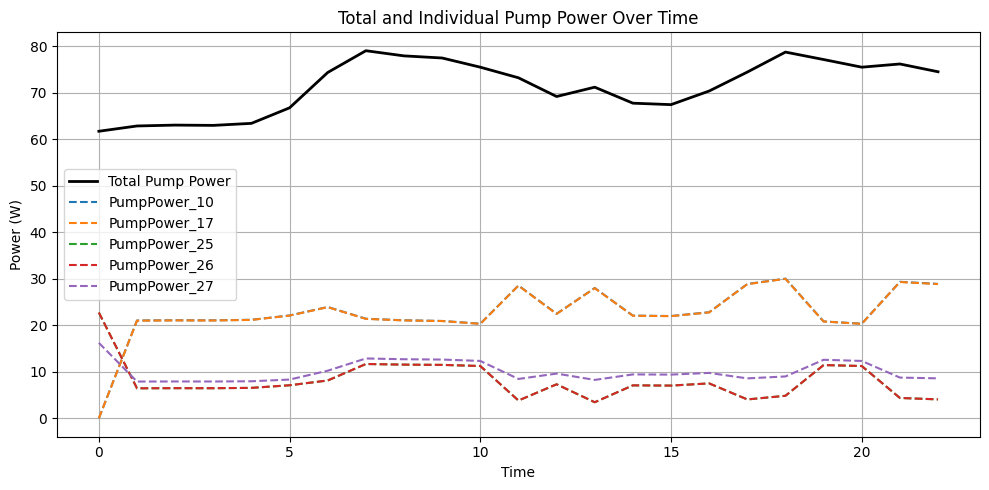

In [81]:
import matplotlib.pyplot as plt

# List of relevant pump power column names
pump_power_columns = ['PumpPower_10', 'PumpPower_17', 'PumpPower_25', 'PumpPower_26', 'PumpPower_27']

# Calculate total pump power at each index
agent_results_df['TotalPumpPower'] = agent_results_df[pump_power_columns].sum(axis=1)

# Plot the total pump power
plt.figure(figsize=(10, 5))
plt.plot(agent_results_df.index, agent_results_df['TotalPumpPower'], label='Total Pump Power', color='black', linewidth=2)

# Optionally plot individual pump powers too
for col in pump_power_columns:
    plt.plot(agent_results_df.index, agent_results_df[col], label=col, linestyle='--')

# Add labels, legend, and title
plt.xlabel("Time")
plt.ylabel("Power (W)")
plt.title("Total and Individual Pump Power Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [82]:
agent_results_df['TotalPumpPower']

Step
0     61.749413
1     62.886478
2     63.073943
3     63.011471
4     63.448426
5     66.791757
6     74.391433
7     79.072732
8     77.963196
9     77.504767
10    75.529718
11    73.249016
12    69.224610
13    71.228932
14    67.788466
15    67.475063
16    70.404566
17    74.480323
18    78.777435
19    77.176761
20    75.529718
21    76.220417
22    74.544973
Name: TotalPumpPower, dtype: float64

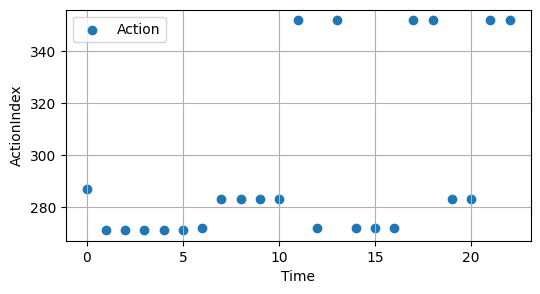

In [83]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.scatter(agent_results_df.index, agent_results_df['ActionIndex'], label='Action')


# Add labels and title
plt.xlabel("Time")
plt.ylabel("ActionIndex")
# plt.title("Pump Power over Time for Vatnsendi")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()

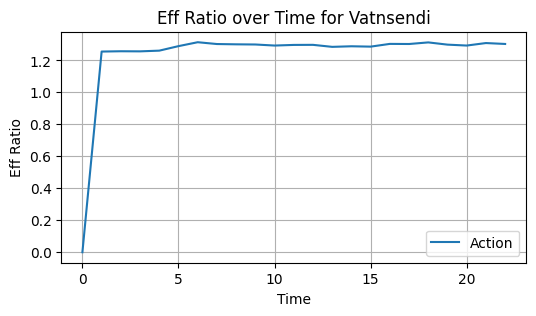

In [84]:

plt.figure(figsize=(6, 3))

# Plot the 'EffRatio' data
plt.plot(agent_results_df.index, agent_results_df['EffReward'], label='Action')

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Eff Ratio")
plt.title("Eff Ratio over Time for Vatnsendi")
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


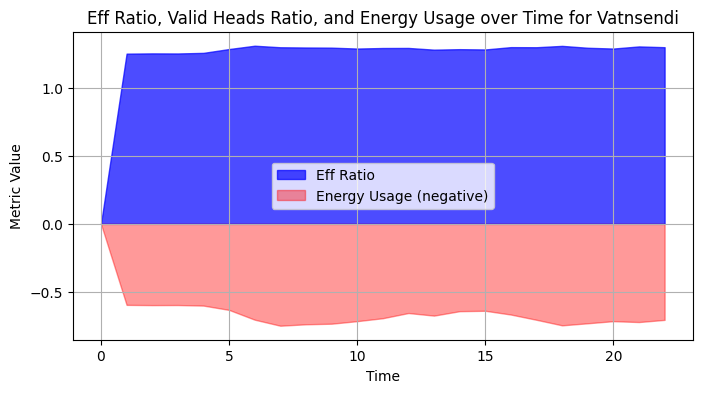

In [85]:
import matplotlib.pyplot as plt

# Create a new column for the sum of EffRatio and ValidHeadsRatio
agent_results_df['Total'] = agent_results_df['EffReward'] + agent_results_df['Energy reward']

plt.figure(figsize=(8, 4))

# Plot the stacked area chart for EffRatio and ValidHeadsRatio
plt.fill_between(agent_results_df.index, 0, agent_results_df['EffReward'], label='Eff Ratio', color='blue', alpha=0.7)


# Plot Energy (negative) below x-axis
plt.fill_between(agent_results_df.index, 0, agent_results_df['Energy reward'], label='Energy Usage (negative)', color='red', alpha=0.4)

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Metric Value")
plt.title("Eff Ratio, Valid Heads Ratio, and Energy Usage over Time for Vatnsendi")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


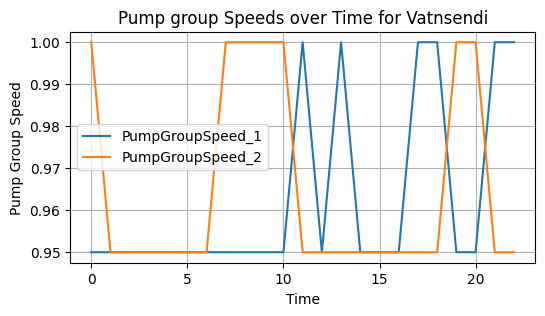

In [86]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.plot(agent_results_df.index, agent_results_df['PumpGroupSpeed_1'], label='PumpGroupSpeed_1')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['PumpGroupSpeed_2'], label='PumpGroupSpeed_2')
# Plot the 'PumpPower_17' data


# Add labels and title
plt.xlabel("Time")
plt.ylabel("Pump Group Speed")
plt.title("Pump group Speeds over Time for Vatnsendi")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


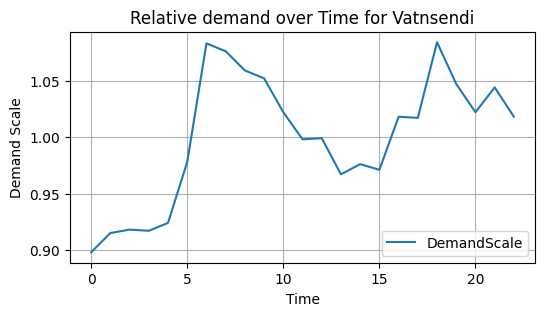

In [87]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.plot(agent_results_df.index, agent_results_df['DemandScale'], label='DemandScale')

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Demand Scale")
plt.title("Relative demand over Time for Vatnsendi")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [88]:
plt.figure(figsize=(10, 5))
for i in range(len(agent_results_df)):
    print(f"Step {i}  Group 1: {agent_results_df['PumpGroupSpeed_1'][i]},  Group 2: {agent_results_df['PumpGroupSpeed_2'][i]}, Group 3: {agent_results_df['PumpGroupSpeed_3'][i]}, Demand scale {agent_results_df['DemandScale'][i]}")


Step 0  Group 1: 0.95,  Group 2: 1.0, Group 3: 1.2, Demand scale 0.898
Step 1  Group 1: 0.95,  Group 2: 0.95, Group 3: 0.85, Demand scale 0.915
Step 2  Group 1: 0.95,  Group 2: 0.95, Group 3: 0.85, Demand scale 0.918
Step 3  Group 1: 0.95,  Group 2: 0.95, Group 3: 0.85, Demand scale 0.917
Step 4  Group 1: 0.95,  Group 2: 0.95, Group 3: 0.85, Demand scale 0.924
Step 5  Group 1: 0.95,  Group 2: 0.95, Group 3: 0.85, Demand scale 0.978
Step 6  Group 1: 0.95,  Group 2: 0.95, Group 3: 0.9, Demand scale 1.083
Step 7  Group 1: 0.95,  Group 2: 1.0, Group 3: 1.0, Demand scale 1.076
Step 8  Group 1: 0.95,  Group 2: 1.0, Group 3: 1.0, Demand scale 1.059
Step 9  Group 1: 0.95,  Group 2: 1.0, Group 3: 1.0, Demand scale 1.052
Step 10  Group 1: 0.95,  Group 2: 1.0, Group 3: 1.0, Demand scale 1.022
Step 11  Group 1: 1.0,  Group 2: 0.95, Group 3: 0.85, Demand scale 0.998
Step 12  Group 1: 0.95,  Group 2: 0.95, Group 3: 0.9, Demand scale 0.999
Step 13  Group 1: 1.0,  Group 2: 0.95, Group 3: 0.85, Demand 

<Figure size 1000x500 with 0 Axes>

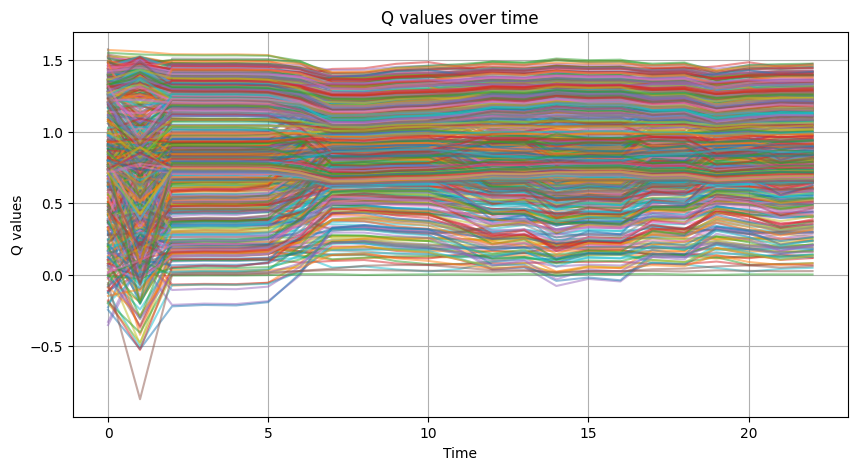

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Loop through all Q-value columns
for i in range(729):
    plt.plot(agent_results_df.index, agent_results_df[f'Q_{i}'], label=f'Q_{i}', alpha=0.5)

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Q values")
plt.title("Q values over time")
plt.grid(True)




# Show the plot
plt.show()
